# Group 12
### Members:
- DIZON, GAVIN RAINE R.
- PALMARES, ALYSSA JAYE L.
- TEE, GIANCARLO T.

## An Overview

The group would be working on a K-means clustering model for the Five Big Personality traits dataset. To give a brief overview of our task, the goal is to cluster the dataset based on the personality traits in the Big Five Personality Model or the Five-Factor model. The Big Five Personality Model or the Five-Factor Model is used for grouping or clustering people based on personality traits. The model uses common descriptors of common languages. This test is mainly used for career assessment since this gives people more insight in how they react in different situations. In addition, this test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg. These are commonly used to describe the human personality and psyche.

## OCEAN or Five Factor Makers

1. **Extraversion (or Extroversion)** which can be identified as someone who gets motivated or energized in the company of others.

2. **Emotional Stability or Neuroticism** is a physical and emotional response to stress and perceived threats in someone’s daily life. This is mostly characterized by sadness or moodiness.
3. **Agreeableness** - these people tend to have high or prosocial behaviors. Moreover, People who exhibit high agreeableness will show signs of trust, altruism, kindness, and affection
4. **Conscientiousness** - includes having high levels of thoughtfulness, good impulse control, and goal-directed behaviors
5. **Openness** - These people are eager to learn and experience new things. They are imaginative and insightful.


### Importing needed libraries

In [1]:
#import sys
#!{sys.executable} -m pip install yellowbrick

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
np.random.seed(0)

## Initializing Functions to be used later

In [3]:
# For visualization
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(15,35))
    for i in range(1, 11):
        plt.subplot(10,3,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=14)

def compare_two_graphs(groupname, questions, arr1, arr2 , grp1_name, grp2_name):
    plt.figure(figsize=(15, 35))
    labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Population"]    
    for i in range(0, len(arr1)):
        plt.subplot(10, 3, i+1)
        height = np.append(arr1[i], arr2[i])
        plt.bar(labels, height=height, color=["blue","blue","blue","blue", "blue", "green"], width = 0.4)
        plt.title(questions[groupname[i-1]], fontsize=14)

## Explaining, Loading, and Preprocessing Data

The data was collected through an online interactive personality test from 2016-2018. This survey was made by the International Personality Item Pool (IPIP). Participants were informed and asked for consent that the data will be recorded and used for research. 

In total, there are `50` questions wherein 10 of which are allotted to a specific factor maker. In the dataset, the questions were labeld as follows:

<body>
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<table style="text-align: left; float:left;">
    <tr>
        <th>Extroversion</th>
        <th>Emotional Stability</th>
        <th>Agreeableness</th>
        <th>Conscientiousness</th>
        <th>Openness</th>
    </tr>
    <tr>
        <td><b>EXT1</b> I am the life of the party.</td>
        <td><b>EST1</b> I get stressed out easily.</td>
        <td><b>AGR1</b> I feel little concern for others.</td>
        <td><b>CSN1</b> I am always prepared.</td>
        <td><b>OPN1</b> I have a rich vocabulary.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT3</b> I feel comfortable around people.</td>
        <td><b>EST3</b> I worry about things.</td>
        <td><b>AGR3</b> I insult people.</td>
        <td><b>CSN3</b> I pay attention to details.</td>
        <td><b>OPN3</b> I have a vivid imagination.</td>
    </tr>
    <tr>
        <td><b>EXT4</b> I keep in the background.</td>
        <td><b>EST4</b> I seldom feel blue.</td>
        <td><b>AGR4</b> I sympathize with others' feelings.</td>
        <td><b>CSN4</b> I make a mess of things.</td>
        <td><b>OPN4</b> I am not interested in abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT5</b> I start conversations.</td>
        <td><b>EST5</b> I am easily disturbed.</td>
        <td><b>AGR5</b> I am not interested in other people's problems.</td>
        <td><b>CSN5</b> I get chores done right away.</td>
        <td><b>OPN5</b> I have excellent ideas.</td>
    </tr>
    <tr>
        <td><b>EXT6</b> I have little to say.</td>
        <td><b>EST6</b> I get upset easily.</td>
        <td><b>AGR6</b> I have a soft heart.</td>
        <td><b>CSN6</b> I often forget to put things back in their proper place.</td>
        <td><b>OPN6</b> I do not have a good imagination.</td>
    </tr>
    <tr>
        <td><b>EXT7</b> I talk to a lot of different people at parties.</td>
        <td><b>EST7</b> I change my mood a lot.</td>
        <td><b>AGR7</b> I am not really interested in others.</td>
        <td><b>CSN7</b> I like order.</td>
        <td><b>OPN7</b> I am quick to understand things.</td>
    </tr>
    <tr>
        <td><b>EXT8</b> I don't like to draw attention to myself.</td>
        <td><b>EST8</b> I have frequent mood swings.</td>
        <td><b>AGR8</b> I take time out for others.</td>
        <td><b>CSN8</b> I shirk my duties.</td>
        <td><b>OPN8</b> I use difficult words.</td>
    </tr>
    <tr>
        <td><b>EXT9</b> I don't mind being the center of attention.</td>
        <td><b>EST9</b> I get irritated easily.</td>
        <td><b>AGR9</b> I feel others' emotions.</td>
        <td><b>CSN9</b> I follow a schedule.</td>
        <td><b>OPN9</b> I spend time reflecting on things.</td>
    </tr>
    <tr>
        <td><b>EXT10</b> I am quiet around strangers.</td>
        <td><b>EST10</b> I often feel blue.</td>
        <td><b>AGR10</b> I make people feel at ease.</td>
        <td><b>CSN10</b> I am exacting in my work.</td>
        <td><b>OPN10</b> I am full of ideas.</td>
    </tr>
</table>   
</body>

Another columns present in the given dataset are the `country` where the survey was answered, `IPC` or the number of users that share the same IP address when taking the test, and the screen size used when taking the test. There are also columns which measures the time they spent on a single question, the start page, and the end page.

### Removing Unused Columns and Rows with Missing Data

Since the only valid data from the dataset are the tables related to the survey such as columns containing Personality related questions like  (EXT, EST , AGR, CSN, and OPN) and the IPC, the other unrelated columns are truncated. The rows with missing values are also dropped.

In [4]:
data = pd.read_csv('data/data-final.csv', sep='\t')
pd.options.display.max_columns = 150

# drop unused columns
data.drop(data.columns[50:], axis=1, inplace=True)

print('How many missing values? ', data.isnull().values.sum())
# drop any rows with missing values.
data.dropna(inplace=True)
print('Number of participants: ', len(data))
data.head()

How many missing values?  89150
Number of participants:  1013558


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  
0   4.0    5.0  
1   5.0    3.0  
2   4.0    4.0  
3   3.0    3.0  
4   5.0    5.0

### Removing zeroes and zero-centering data
We then remove the zeros from the data as they signify that the person who answered skipped a question or multiple questions. We also zero-center the data to better visualize the respondent's answers by subtracting their answer by 3, which means they are neutral according to the Likert scale. Strongly agree will now be represented as `2`, and strongly disagree is now `-2`. 

In [5]:
# dropping rows with zeros
data = data[(data != 0).all(1)]

# Subtract 3 pre-processing
data = data.apply(lambda x: x - 3)
print('Number of participants: ', len(data))
data.head()

Number of participants:  874434


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   1.0  -2.0   2.0  -1.0   2.0  -2.0   2.0  -1.0   1.0   -2.0  -2.0   1.0   
1   0.0   2.0   0.0   1.0   0.0   0.0  -1.0   2.0  -2.0    2.0  -1.0   0.0   
2  -1.0   0.0   1.0   1.0   0.0  -1.0  -2.0   0.0  -1.0    2.0   1.0   1.0   
3  -1.0  -1.0  -1.0   0.0   1.0  -1.0  -1.0   1.0  -2.0    1.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   2.0   0.0   0.0   2.0   0.0    1.0  -2.0   2.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   -1.0  -1.0   2.0  -1.0   1.0   
1   1.0  -2.0   0.0  -2.0  -1.0  -2.0   0.0   -2.0  -2.0   1.0  -2.0   2.0   
2   1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -2.0    0.0  -2.0   1.0  -2.0   1.0   
3   0.0  -1.0   0.0  -1.0  -1.0  -1.0   1.0    0.0  -1.0   1.0   0.0   1.0   
4   2.0   0.0  -2.0  -2.0  -2.0  -2.0   0.0   -1.0  -2.0   2.0  -2.0   2.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0  -1.0   0.0  -1.0   1.0   0.0    1.0   0.0   1.0   0.0  -1.0  -1.0   1.0   
1  -2.0   2.0   0.0   1.0   2.0    0.0   0.0  -1.0   2.0   0.0   0.0  -2.0   
2  -1.0   1.0  -2.0   1.0   1.0    0.0   1.0  -1.0  -1.0  -1.0   0.0   0.0   
3  -1.0   1.0  -1.0   1.0   0.0    1.0  -1.0   1.0   1.0   1.0  -2.0  -1.0   
4  -2.0   0.0  -2.0   2.0   2.0    0.0   2.0  -2.0   2.0  -2.0   0.0  -2.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   1.0  -1.0   1.0    1.0   2.0  -2.0   1.0  -2.0   1.0  -2.0   2.0   0.0   
1   0.0   0.0   2.0    0.0  -2.0  -1.0   1.0  -1.0   0.0  -2.0   1.0  -1.0   
2   1.0  -1.0   1.0   -1.0   2.0  -2.0  -1.0  -2.0   1.0  -1.0   2.0   0.0   
3  -1.0   0.0  -2.0    1.0   1.0  -1.0   2.0  -1.0   0.0  -2.0   1.0   1.0   
4   2.0  -2.0   2.0    2.0   2.0  -2.0   2.0  -2.0   2.0  -2.0   2.0   0.0   

   OPN9  OPN10  
0   1.0    2.0  
1   2.0    0.0  
2   1.0    1.0  
3   0.0    0.0  
4   2.0    2.0

## Initializing Variables for Visualization

In [6]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'
}


EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]



# Exploratory Data Analysis (EDA)

## Data Visualization

Here, we show the number of respondents and their answers for each questions for each personality makers.

Q&As Related to Extroversion Personality


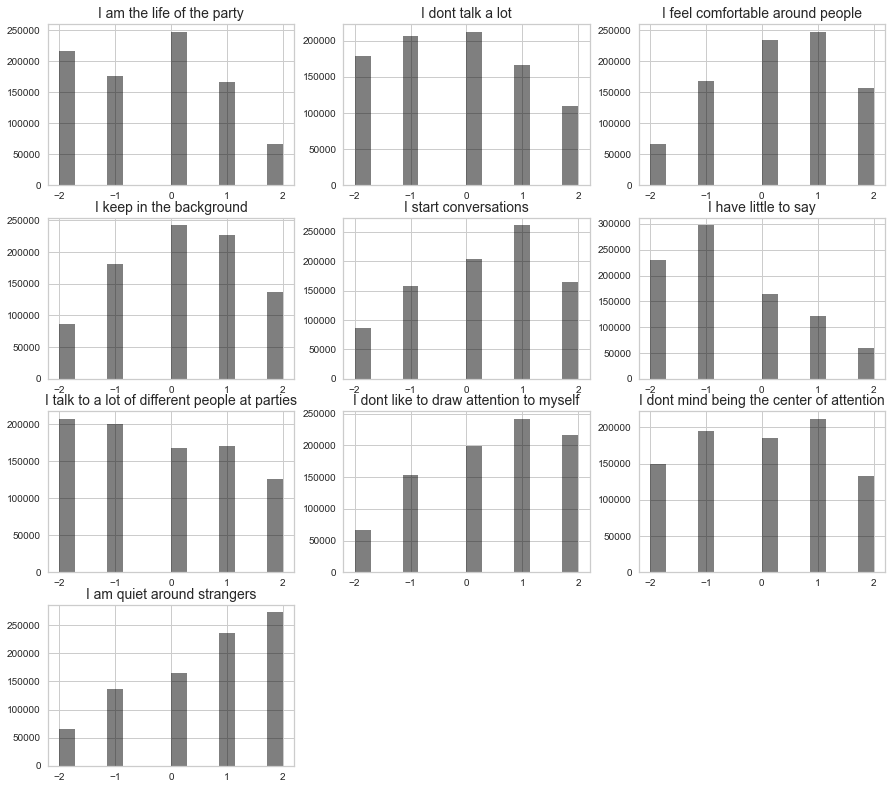

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'black')

Q&As Related to Emotional Stability Personality


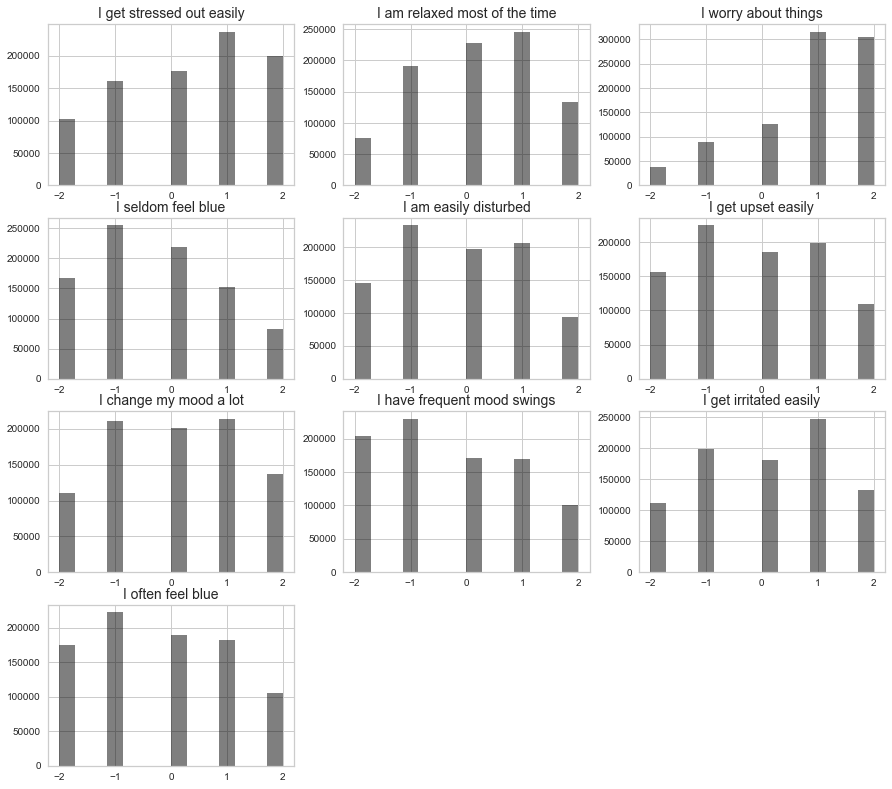

In [8]:
print('Q&As Related to Emotional Stability Personality')
vis_questions(EST, est_questions, 'black')

Q&As Related to Agreeableness Personality


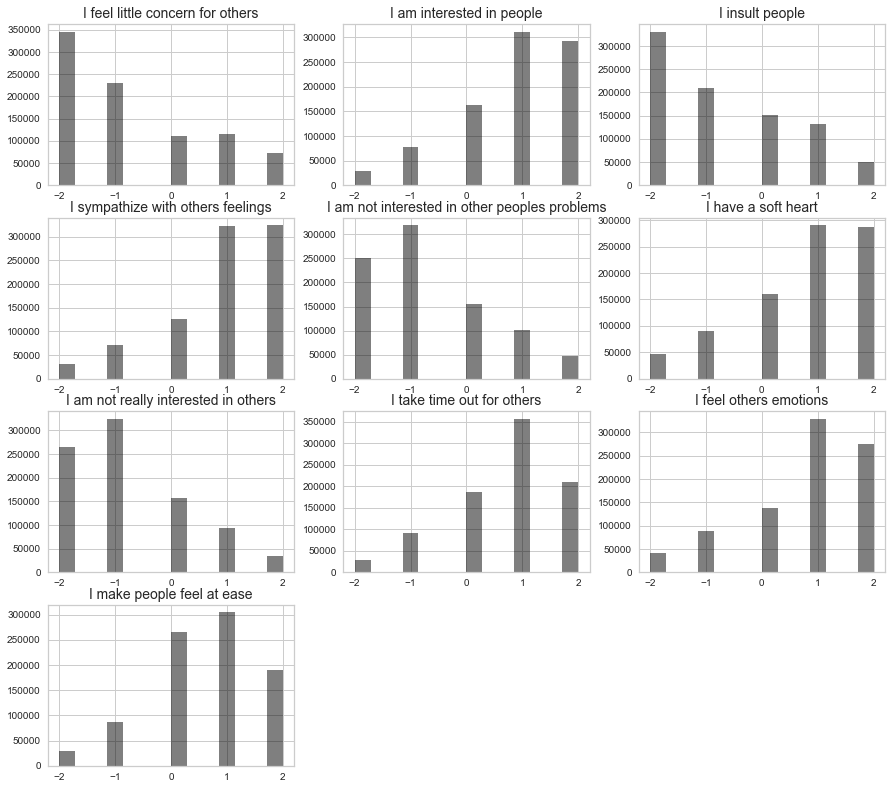

In [9]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'black')

Q&As Related to Conscentiousness Personality


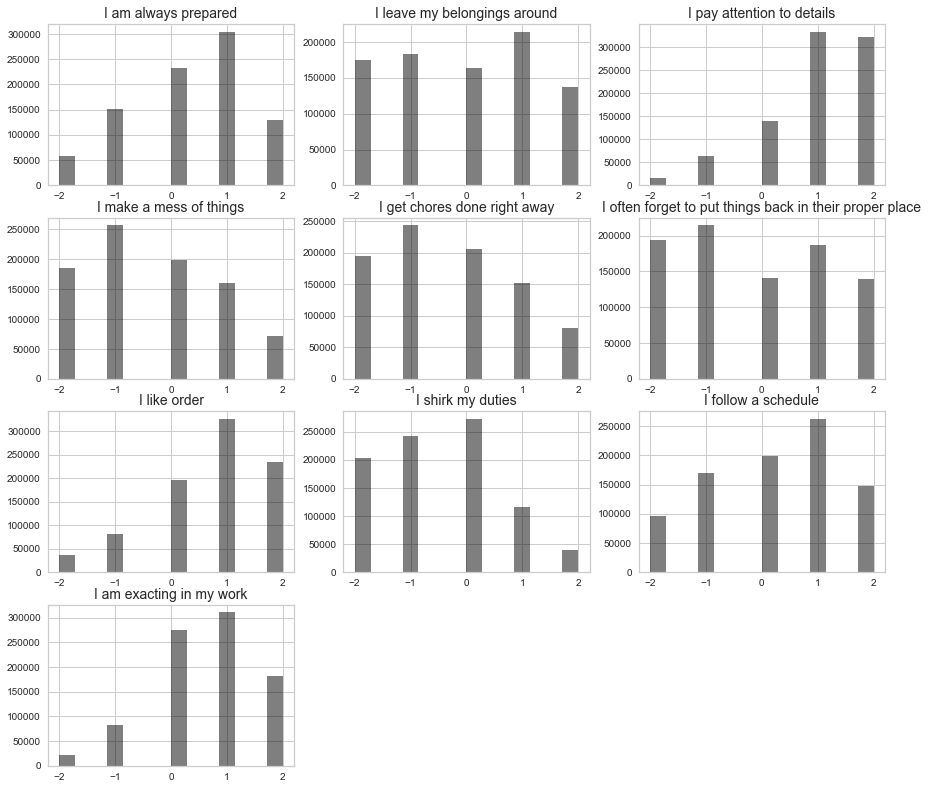

In [10]:
print('Q&As Related to Conscentiousness Personality')
vis_questions(CSN, csn_questions, 'black')

Q&As Related to Openness Personality


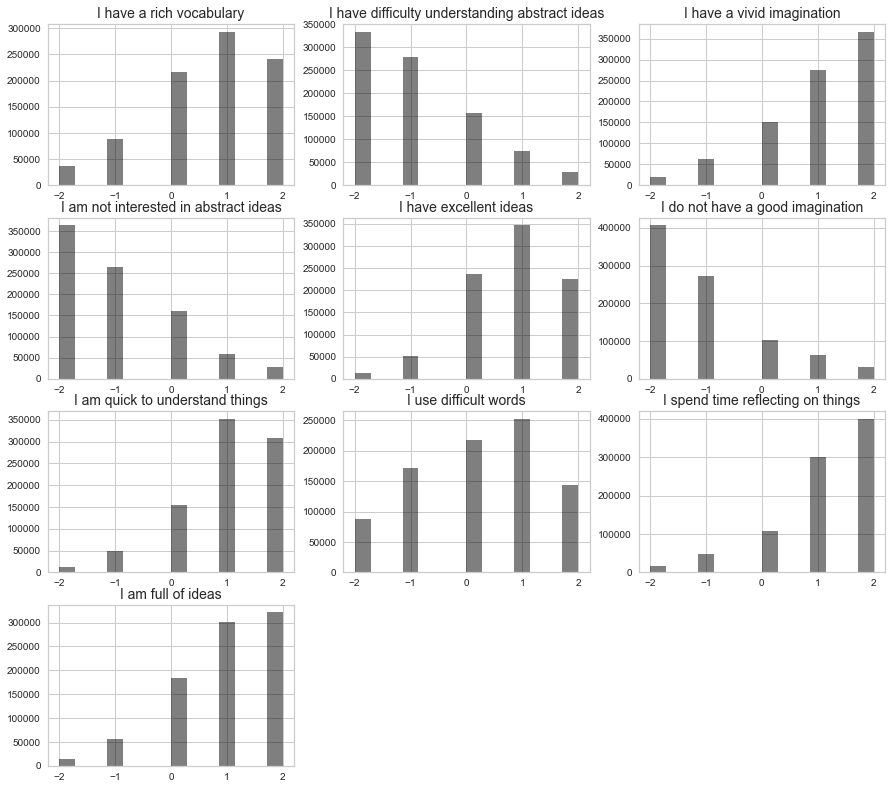

In [11]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'black')


# The Task

The main task is to create clusters with the given data. The main problem with these kind of dataset is that there is no exact `label` that we can use to create the clustering. There are unsupervised machine learning models that handle this situation but for this experiment, we will be using the **K-Means cluster**.


> K-means cluster is an iterative algorithm that divides an unlabeled dataset into *k* different clusters in such a way that each row in the dataset belongs only to one group that has similar properties or `features`. 

## Finding an optimum number of clusters

Before, we delve into the actual clustering. We first need to define `k` which is the number of clusters to be made. There are numerous ways to find the `optimum` number however, in this case, we will be using the `elbow` method.

### Elbow Method

`KElbowVisualizer` is used to find an optimal number  of clusters for k-means clustering using the **elbow** method. Here, we pass a range of k's to evaluate and use `KMeans` as the estimator. Once we fit this to the data we can make use of its attribute, the elbow value which is the optimum value. Here, we will only be getting `50000` sample from our original data.

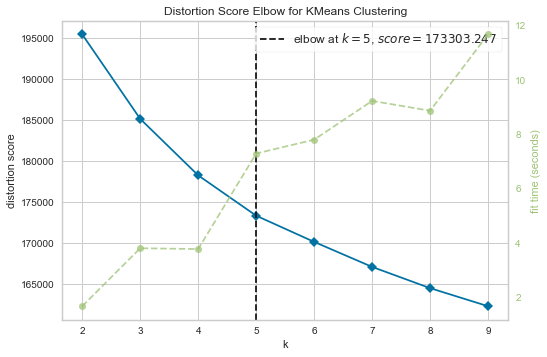

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#df_opt = data.drop('Cluster', axis=1)
df_opt = data.sample(50000, random_state=42)
#print(df_opt.iloc[2])
columns = list(df_opt.columns)
scaler = MinMaxScaler(feature_range=(0,1))
df_opt = scaler.fit_transform(df_opt)
df_opt = pd.DataFrame(df_opt, columns=columns)
visualizer = KElbowVisualizer(estimator=KMeans(random_state=42), k=(2,10))
visualizer.fit(df_opt)
visualizer.poof()

In [13]:
visualizer.elbow_value_

5

## Training

Now, we use the obtained `elbow_value_` to train our model

In [14]:
df = data

kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
k_fit = kmeans.fit(df)
predictions = k_fit.labels_

# Create a new column of clusters to predict the data
df['Cluster'] = predictions

### Getting the Mean per Clusters

Now, we get the mean of each of the personality makers for each clusters. 

In [15]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').describe()

extroversion                                               neurotic  \
                count      mean       std  min  25%  50%  75%  max     count   
clusters                                                                       
0            181937.0  0.056908  0.337766 -1.8 -0.2  0.0  0.3  2.0  181937.0   
1            171554.0 -0.029233  0.333754 -2.0 -0.2  0.0  0.2  2.0  171554.0   
2            146359.0 -0.000653  0.355526 -2.0 -0.2  0.0  0.2  2.0  146359.0   
3            181514.0  0.089025  0.299229 -1.6 -0.1  0.1  0.3  2.0  181514.0   
4            193070.0  0.074555  0.347532 -1.9 -0.1  0.1  0.3  2.0  193070.0   

                                                      agreeable            \
              mean       std  min  25%  50%  75%  max     count      mean   
clusters                                                                    
0         0.002426  0.476714 -2.0 -0.3  0.0  0.3  2.0  181937.0  0.196790   
1         0.661806  0.423878 -1.2  0.4  0.7  1.0  2.0  171554.0  0.159741   
2        -0.373411  0.459323 -2.0 -0.7 -0.4 -0.1  1.6  146359.0 -0.049687   
3        -0.575088  0.421059 -2.0 -0.9 -0.6 -0.3  1.6  181514.0  0.213730   
4         0.432131  0.464197 -1.4  0.1  0.4  0.7  2.0  193070.0  0.306912   

                                            conscientious                      \
               std  min  25%  50%  75%  max         count      mean       std   
clusters                                                                        
0         0.302732 -1.7  0.0  0.2  0.4  1.9      181937.0  0.162650  0.335892   
1         0.357359 -1.9 -0.1  0.2  0.4  2.0      171554.0  0.181244  0.391665   
2         0.367575 -2.0 -0.3  0.0  0.2  1.9      146359.0  0.029355  0.387214   
3         0.302245 -1.6  0.0  0.2  0.4  1.9      181514.0  0.114222  0.354069   
4         0.329432 -1.8  0.1  0.3  0.5  2.0      193070.0  0.220079  0.402516   

                                       open                                \
          min  25%  50%  75%  max     count      mean       std  min  25%   
clusters                                                                    
0        -1.6 -0.1  0.2  0.4  1.9  181937.0  0.238718  0.358152 -1.8  0.0   
1        -1.6 -0.1  0.2  0.4  2.0  171554.0  0.250734  0.388563 -2.0  0.0   
2        -2.0 -0.2  0.0  0.3  2.0  146359.0  0.254360  0.402668 -2.0  0.0   
3        -2.0 -0.1  0.1  0.3  2.0  181514.0  0.337097  0.341228 -1.6  0.1   
4        -1.6  0.0  0.2  0.5  2.0  193070.0  0.366752  0.366729 -1.6  0.1   

                         
          50%  75%  max  
clusters                 
0         0.2  0.5  2.0  
1         0.3  0.5  2.0  
2         0.3  0.5  2.0  
3         0.4  0.6  2.0  
4         0.4  0.6  2.0

## Principal Component Analysis

**Prinicipal Component analysis (PCA)** is a dimensionality-reduction method used to reduce dimensionality (or features) of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. However, dimensionality-reduction would have a minimal trade-off to the accuracy of the result. Here, we use PCA to visualize the personality clusters. To do this, we will be reducing the features from 50 (the number of questions) to 2 `n_components`. This is for us to visualize the graph in a 2D-plane.

In [16]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

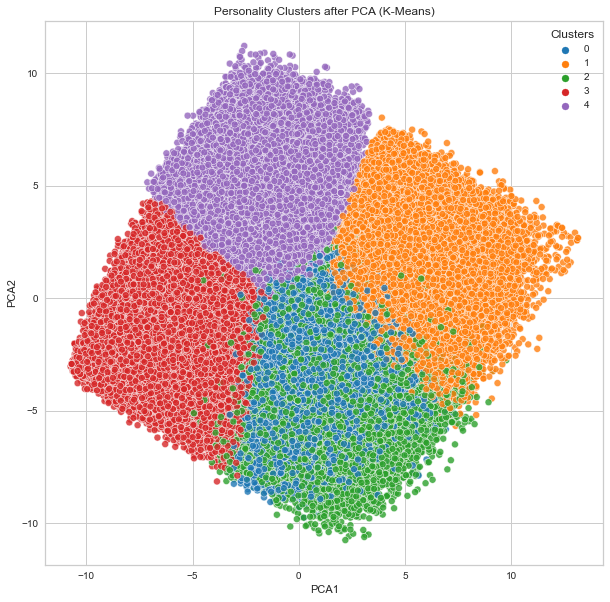

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (K-Means)');

## T-Distributed Stochastic Neighbor Embedding

**T-Distributed Stochastic Neighbor Embedding or TSNE** is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. Similar to the PCA, we will be using this technique to trim down our 50 features to 2 to easily visualize it in a scatterplot. Unlike the PCA, t-SNE preserves only small pairwise distances or local similarities.

### Getting a Sample and Computing T-SNE

In [20]:
tsne_sample = df.sample(50000, random_state=42)
tsne_embedded = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample.drop("Cluster", axis=1))
tsne_df = pd.DataFrame(data=tsne_embedded, columns=['X','y'])
tsne_df['Clusters'] = list(tsne_sample['Cluster'])

### Visualizing T-SNE

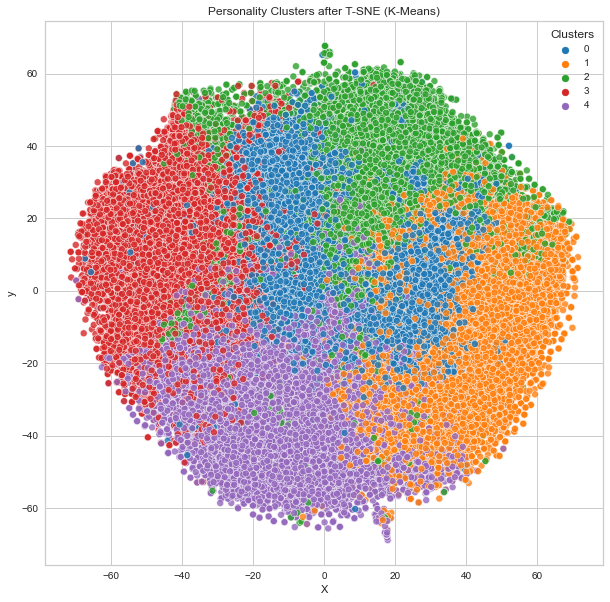

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (K-Means)');

# Alternative Models

Other than the usual K-means cluster approach, there are also alternative methods that we can use to cluster an unlabeled dataset. However, we will not be tuning the parameters of these models since our main focus is the K-means clustering. Nonetheless, we will be visualizing how they are clustered.

## Batch K-Means

Mini-Batch K-Means uses small, random fixed-size batch of data to store in memory and with each iteration, a random sample of the data will be collected and used in updating the clusters.


In [22]:
df_mb = data.drop('Cluster', axis=1)

mbKMeans = MiniBatchKMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
mbKMeans.fit(df_mb)

# Create a new column of clusters to predict the data
df_mb['Cluster'] = mbKMeans.labels_

Init 1/3 with method k-means++
Inertia for init 1/3: 278393.0
Init 2/3 with method k-means++
Inertia for init 2/3: 267873.0
Init 3/3 with method k-means++
Inertia for init 3/3: 269357.0
Minibatch step 1/426969: mean batch inertia: 85.111328125
Minibatch step 2/426969: mean batch inertia: 57.3198585059406, ewa inertia: 57.3198585059406
Minibatch step 3/426969: mean batch inertia: 57.85096889365212, ewa inertia: 57.32110241094673
Minibatch step 4/426969: mean batch inertia: 56.659404805697605, ewa inertia: 57.31955265974103
Minibatch step 5/426969: mean batch inertia: 57.38336922163343, ewa inertia: 57.31970212347333
Minibatch step 6/426969: mean batch inertia: 57.109063742971884, ewa inertia: 57.319208790746174
Minibatch step 7/426969: mean batch inertia: 57.57040906096657, ewa inertia: 57.31979712281592
Minibatch step 8/426969: mean batch inertia: 56.642966822925445, ewa inertia: 57.31821192957208
Minibatch step 9/426969: mean batch inertia: 55.98606233161743, ewa inertia: 57.315091923

Minibatch step 197/426969: mean batch inertia: 56.95161152956342, ewa inertia: 56.88576287778552
Minibatch step 198/426969: mean batch inertia: 56.01711718603901, ewa inertia: 56.883728436830275
Minibatch step 199/426969: mean batch inertia: 56.10638506016761, ewa inertia: 56.88190783354312
Minibatch step 200/426969: mean batch inertia: 56.67851891843645, ewa inertia: 56.88143147967103
Minibatch step 201/426969: mean batch inertia: 56.66109262811588, ewa inertia: 56.880915427628295
Minibatch step 202/426969: mean batch inertia: 56.46034608857793, ewa inertia: 56.879930419015444
Minibatch step 203/426969: mean batch inertia: 57.219331634621625, ewa inertia: 56.88072532508571
Minibatch step 204/426969: mean batch inertia: 56.61800890142142, ewa inertia: 56.88011002122017
Minibatch step 205/426969: mean batch inertia: 55.23237840239571, ewa inertia: 56.87625089577877
Minibatch step 206/426969: mean batch inertia: 56.29819410423842, ewa inertia: 56.87489703836332
Minibatch step 207/426969:

Minibatch step 312/426969: mean batch inertia: 55.412277126373084, ewa inertia: 56.72644533495165
Minibatch step 313/426969: mean batch inertia: 56.00918747370237, ewa inertia: 56.72476545697348
Minibatch step 314/426969: mean batch inertia: 55.56306130595149, ewa inertia: 56.722044648564285
Minibatch step 315/426969: mean batch inertia: 54.09234400435626, ewa inertia: 56.71588566942994
Minibatch step 316/426969: mean batch inertia: 56.30616506054509, ewa inertia: 56.714926069451664
Minibatch step 317/426969: mean batch inertia: 56.046868473152934, ewa inertia: 56.71336142261431
Minibatch step 318/426969: mean batch inertia: 54.096249918700984, ewa inertia: 56.70723192830083
Minibatch step 319/426969: mean batch inertia: 56.61712290257465, ewa inertia: 56.70702088541635
Minibatch step 320/426969: mean batch inertia: 56.51542438659402, ewa inertia: 56.70657215037076
Minibatch step 321/426969: mean batch inertia: 56.27024943261546, ewa inertia: 56.70555024602571
Minibatch step 322/426969

Minibatch step 478/426969: mean batch inertia: 55.788215991125504, ewa inertia: 56.529768732919734
Minibatch step 479/426969: mean batch inertia: 55.051043876839444, ewa inertia: 56.526305435470235
Minibatch step 480/426969: mean batch inertia: 57.346298426729334, ewa inertia: 56.52822592772649
Minibatch step 481/426969: mean batch inertia: 54.9313496399837, ewa inertia: 56.524485909729385
Minibatch step 482/426969: mean batch inertia: 56.65244692755108, ewa inertia: 56.52478560514928
Minibatch step 483/426969: mean batch inertia: 56.08159373498562, ewa inertia: 56.52374761267403
Minibatch step 484/426969: mean batch inertia: 55.65886656097303, ewa inertia: 56.52172198882104
Minibatch step 485/426969: mean batch inertia: 55.7550208505468, ewa inertia: 56.519926310547426
Minibatch step 486/426969: mean batch inertia: 56.346425821565006, ewa inertia: 56.51951995787234
Minibatch step 487/426969: mean batch inertia: 55.16252956817054, ewa inertia: 56.51634177273781
Minibatch step 488/42696

Minibatch step 564/426969: mean batch inertia: 56.3185509748236, ewa inertia: 56.454867432658226
Minibatch step 565/426969: mean batch inertia: 56.76282883426945, ewa inertia: 56.45558870405118
Minibatch step 566/426969: mean batch inertia: 55.099872084649476, ewa inertia: 56.452413502193366
Minibatch step 567/426969: mean batch inertia: 56.719184898364816, ewa inertia: 56.4530383031441
Minibatch step 568/426969: mean batch inertia: 56.37151689579395, ewa inertia: 56.45284737318103
Minibatch step 569/426969: mean batch inertia: 56.03455612289018, ewa inertia: 56.45186770004283
Minibatch step 570/426969: mean batch inertia: 57.06176694359958, ewa inertia: 56.45329613514756
Minibatch step 571/426969: mean batch inertia: 56.30708425011465, ewa inertia: 56.452953694668224
Minibatch step 572/426969: mean batch inertia: 55.58300688660023, ewa inertia: 56.45091620638959
Minibatch step 573/426969: mean batch inertia: 55.695291681067744, ewa inertia: 56.449146470471135
Minibatch step 574/426969

Minibatch step 649/426969: mean batch inertia: 55.84486758121701, ewa inertia: 56.400438985263
Minibatch step 650/426969: mean batch inertia: 56.468662568163566, ewa inertia: 56.40059877060757
Minibatch step 651/426969: mean batch inertia: 56.240748498148236, ewa inertia: 56.40022438788273
Converged (lack of improvement in inertia) at step 651/426969


### Get Mean

In [23]:
col_list = list(df_mb)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_mb = pd.DataFrame()
data_sums_mb['extroversion'] = df_mb[ext].sum(axis=1)/10
data_sums_mb['neurotic'] = df_mb[est].sum(axis=1)/10
data_sums_mb['agreeable'] = df_mb[agr].sum(axis=1)/10
data_sums_mb['conscientious'] = df_mb[csn].sum(axis=1)/10
data_sums_mb['open'] = df_mb[opn].sum(axis=1)/10
data_sums_mb['clusters'] = mbKMeans.labels_
data_sums_mb.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             0.050794  0.552200   0.291561       0.213274  0.361393
1             0.079095 -0.134632   0.278099       0.191010  0.344644
2            -0.042286 -0.005933  -0.070777       0.063245  0.236613
3             0.087890 -0.644398   0.121301       0.053959  0.280777
4             0.009846  0.416762   0.197015       0.188883  0.229746

### Computing the PCA

In [24]:
pca_mb = PCA(n_components=2)
pca_mb_fit = pca_mb.fit_transform(df_mb)

df_pca_mb = pd.DataFrame(data=pca_mb_fit, columns=['PCA1', 'PCA2'])
df_pca_mb['Clusters'] = mbKMeans.labels_
# TSNE

### Visualizing the Model

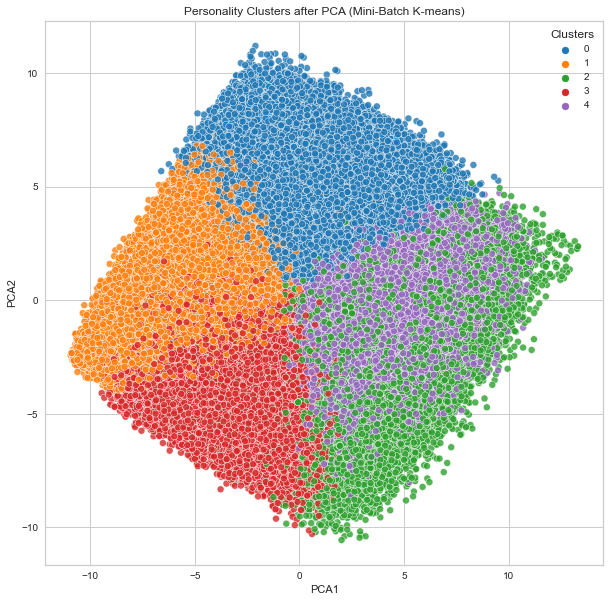

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_mb, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Mini-Batch K-means)');

### Computing for the T-SNE

In [26]:
tsne_sample_mb = df_mb.sample(50000, random_state=42)
cluster_data = list(tsne_sample_mb['Cluster'])

tsne_embedded_mb = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample_mb.drop("Cluster", axis=1))
tsne_df_mb = pd.DataFrame(data=tsne_embedded_mb, columns=['X','y'])
tsne_df_mb['Clusters'] = cluster_data

### Visualizing the Clusters T-SNE

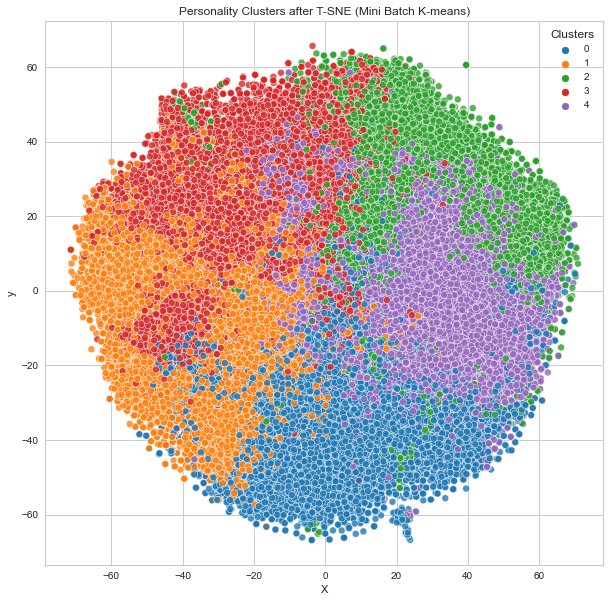

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Mini Batch K-means)');

## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

In [28]:
df_gmm = data.drop('Cluster', axis=1)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_gmm)

# Create a new column of clusters to predict the data
df_gmm['Cluster'] = gmm.predict(df_gmm)

### Computing for the PCA

In [29]:
pca_gmm = PCA(n_components=2)
pca_gmm_fit = pca_mb.fit_transform(df_gmm)

df_pca_gmm = pd.DataFrame(data=pca_gmm_fit, columns=['PCA1', 'PCA2'])
df_pca_gmm['Clusters'] = list(df_gmm['Cluster'])

### Visualizing the Clusters with PCA

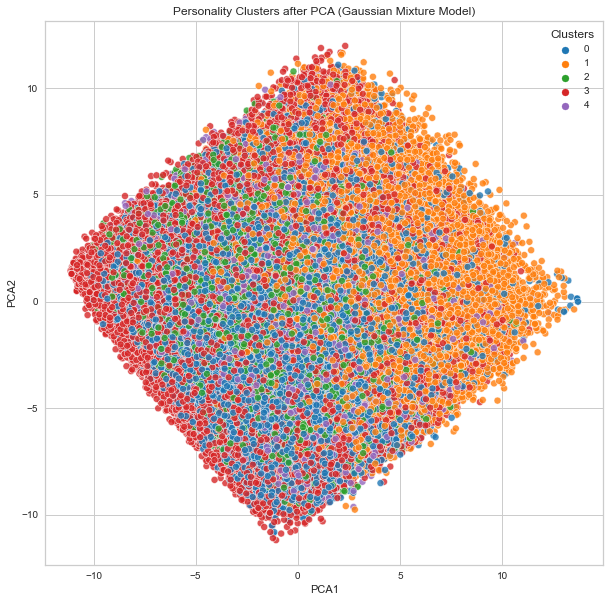

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_gmm, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Gaussian Mixture Model)');

### Computing for the T-SNE

In [31]:
tsne_sample_gmm = df_gmm.sample(50000, random_state=42)
cluster_data_gmm = list(tsne_sample_gmm['Cluster'])
tsne_embedded_gmm = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample_gmm.drop("Cluster", axis=1))
tsne_df_gmm = pd.DataFrame(data=tsne_embedded_gmm, columns=['X','y'])
tsne_df_gmm['Clusters'] = cluster_data_gmm

### Visualizing the Clusters with T-SNE

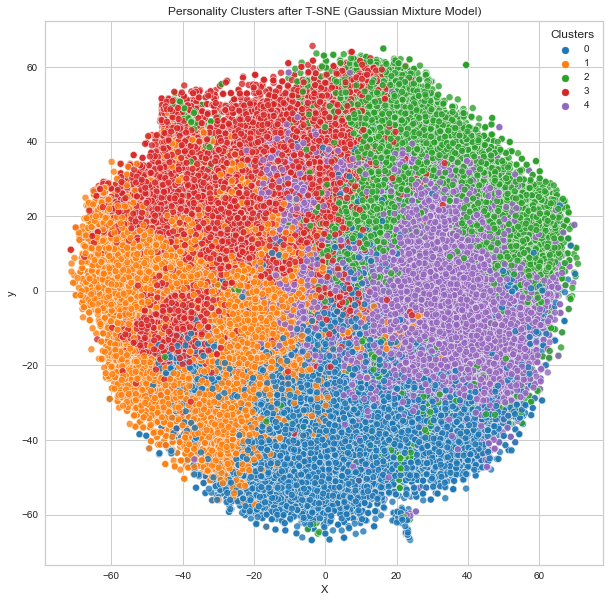

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Gaussian Mixture Model)');

## Validating and Evaluating the Clusters for each models

Among the three models, we compute for three scores that are used to evaluate how well the clustering was done. These three are as follows:
1. **calinski-harabasz** - is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. A higher value would mean a better clustering. 
2. **davies_bouldin** (score) - is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.
3. **silhouette** - is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Evaluating through PCA

In [33]:
# remove column cluster
col = list(df_pca.columns)
col.remove("Clusters")
col

df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
df_eval.loc[len(df_eval.index)]= ["K-means", calinski_harabasz_score(df_pca[col], df_pca['Clusters']), davies_bouldin_score(df_pca[col], df_pca['Clusters']), silhouette_score(df_pca[col], df_pca['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
df_eval.loc[len(df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(df_pca_mb[col], df_pca_mb['Clusters']), davies_bouldin_score(df_pca_mb[col], df_pca_mb['Clusters']), silhouette_score(df_pca_mb[col], df_pca_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
df_eval.loc[len(df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(df_pca_gmm[col], df_pca_gmm['Clusters']), davies_bouldin_score(df_pca_gmm[col], df_pca_gmm['Clusters']), silhouette_score(df_pca_gmm[col], df_pca_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [34]:
df_eval

Model  Calinski-Harabasz  Davies_Bouldin  Silhouette
0                 K-means      486524.930375        5.440401    0.244606
1      Mini-Batch K-means      379377.807631        3.151135    0.165425
2  Gaussian Mixture Model       25880.645125       40.136154   -0.062166

### Evaluating through T-SNE

In [35]:
# remove column cluster
col = list(tsne_df.columns)
col.remove("Clusters")
col

tsne_df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["K-means", calinski_harabasz_score(tsne_df[col], tsne_df['Clusters']), davies_bouldin_score(tsne_df[col], tsne_df['Clusters']), silhouette_score(tsne_df[col], tsne_df['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(tsne_df_mb[col], tsne_df_mb['Clusters']), davies_bouldin_score(tsne_df_mb[col], tsne_df_mb['Clusters']), silhouette_score(tsne_df_mb[col], tsne_df_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), davies_bouldin_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), silhouette_score(tsne_df_gmm[col], tsne_df_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [36]:
tsne_df_eval

Model  Calinski-Harabasz  Davies_Bouldin  Silhouette
0                 K-means       20741.797329        1.591350    0.188932
1      Mini-Batch K-means       17940.212052        1.626251    0.120554
2  Gaussian Mixture Model        1069.256287       32.421349   -0.068537

# Analysis

In this section, we will further analayze the obtained scores from the clustering as well as further analysis/ comparison between the Cluster and Population to see trends.

## Analyzing the Scores

Out of all the scores, the K-means clustering model had the best output in terms of...

## Analyzing the Result of K-Means

### Getting the General Mean for each Personality per Cluster

In [37]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             0.056908  0.002426   0.196790       0.162650  0.238718
1            -0.029233  0.661806   0.159741       0.181244  0.250734
2            -0.000653 -0.373411  -0.049687       0.029355  0.254360
3             0.089025 -0.575088   0.213730       0.114222  0.337097
4             0.074555  0.432131   0.306912       0.220079  0.366752

**Analysis**: Averaging each questions in the personality we could see that there is no significant difference between all of the clusters as its average of each personality play between `-0.6` to `0.6`. With this, a better approach would be getting the mean for each questions per cluster (and then visualizing it).

### Getting the mean and standard deviation for each questions per cluster

In [38]:
df_cluster = df.groupby('Cluster').mean()
df_cluster_std = df.groupby('Cluster').std()

### Extroversion Questions

#### Cluster Mean vs Population Mean comparison

Extroversion Questions: Cluster Mean vs Population Mean comparison


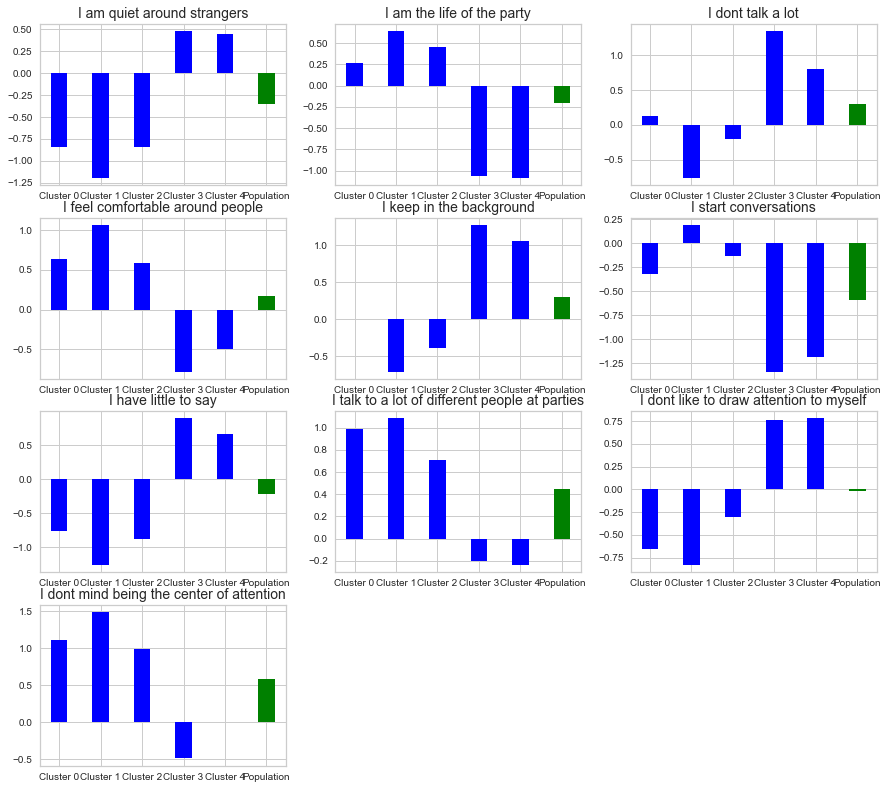

In [39]:
EXT_df_cluster = [column for column in df_cluster if column.startswith('EXT')]
print("Extroversion Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EXT, ext_questions, df_cluster[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

In general, it can be seen that most respondents in `cluster 3` and `cluster 4` are both similar when it comes to extroversion response. They lean more into the non-extroverted side as most responses on the even questions which are questions pointing towards extroversion lean more on the negative side while most responses on the odd questions which point towards introversion lean largely on the positive side. On the other hand, the other 3 clusters which are clusters `1`, `2`, and `3` have most of their respondents mostly on the pro-extroversion side with `cluster 1` being the cluster with the most positive responses with regards to extroversion behavior.

Comparing this to the mean of the population, the general trend from the results is that overall, a bit more of the respondents show traits aligning to extroversion than there are not.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

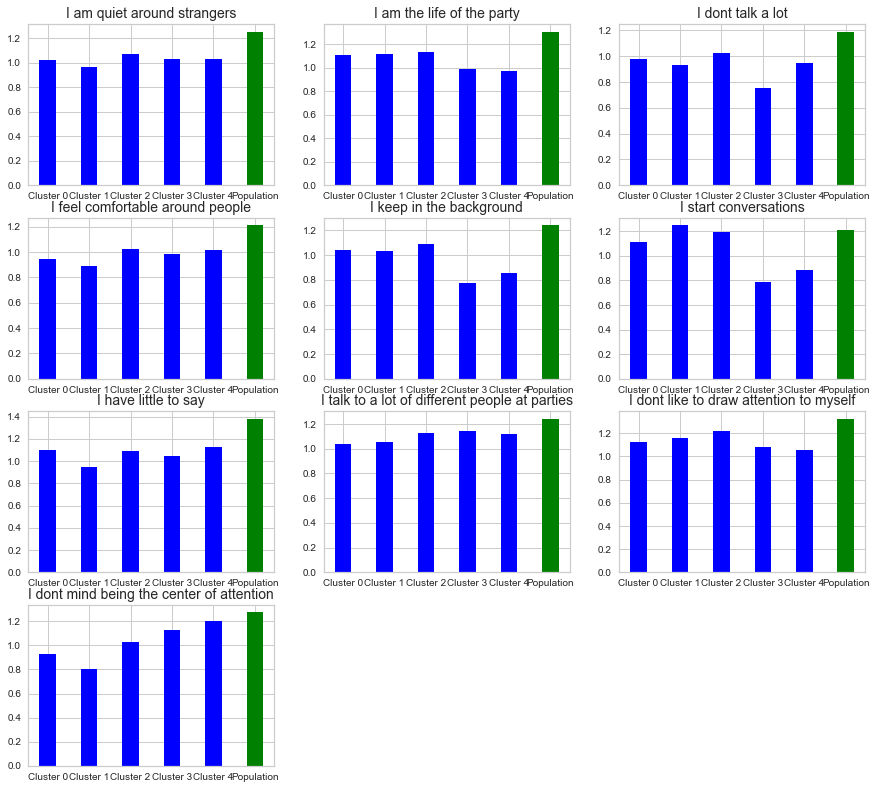

In [44]:
compare_two_graphs(EXT, ext_questions, df_cluster_std[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].std().transpose(), "Cluster ", "Population STD")

### Emotional Stability Questions

#### Cluster Mean vs Population Mean comparison

Emotional Stability Questions: Cluster Mean vs Population Mean comparison


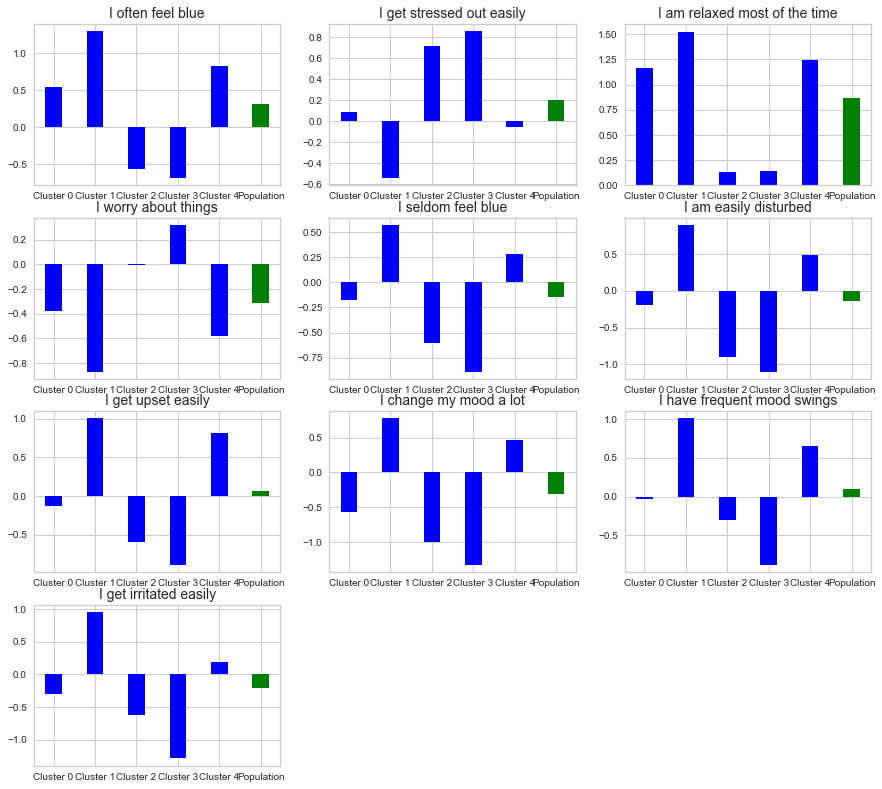

In [40]:
EST_df_cluster = [column for column in df_cluster if column.startswith('EST')]
print("Emotional Stability Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EST, est_questions, df_cluster[EST_df_cluster].values.transpose(), df[EST_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

Unlike extroversion, the responses of the respondents in each cluster varies for each question. However it can be noted that a large majority of the respondents in all clusters answered positively when it came to `EST3` which is `I am relaxed most of the time` with `cluster 2` having the lowest mean. In addition, cluster `1` and `3` generally have the same trend of responses aligning more into high emotional stability with negative average responses on most questions. `cluster 2` and `cluster 3` on the other hand generally responded positively to questions pointing to emotional instability.

Looking at the population mean, it can be seen that most respondents generally lean more towards having emotional stability although moderately as the mean generally drifts near `0.0` in most questions.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

Emotional Stability Questions: Cluster Standard Deviation vs Population Standard Deviation comparison


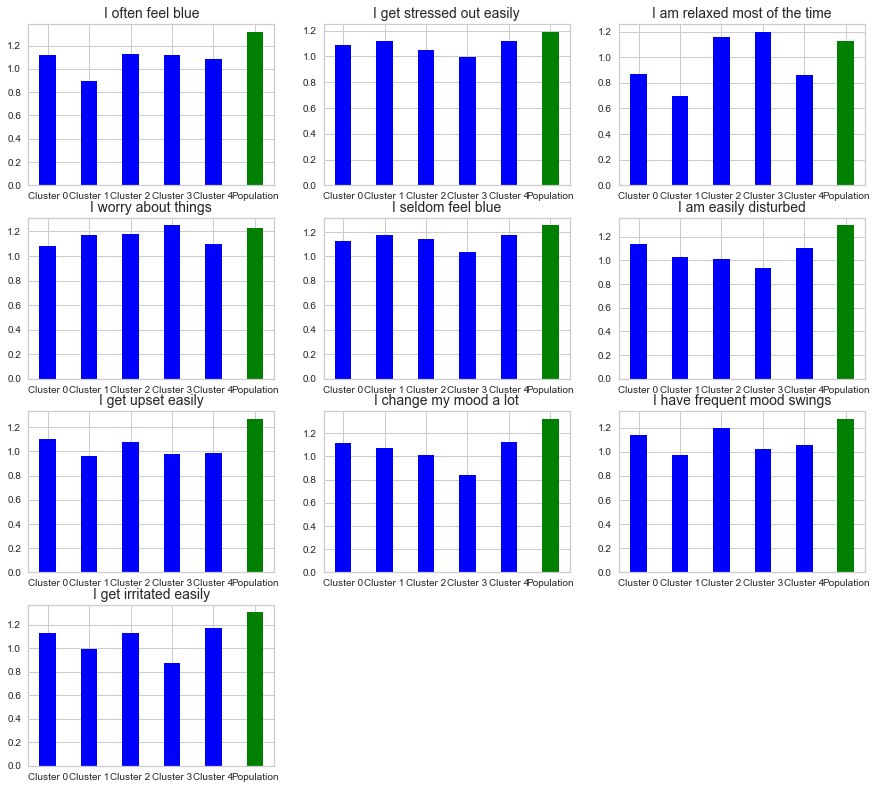

In [45]:
print("Emotional Stability Questions: Cluster Standard Deviation vs Population Standard Deviation comparison")
compare_two_graphs(EST, est_questions, df_cluster_std[EST_df_cluster].values.transpose(), df[EST_df_cluster].std().transpose(), "Cluster ", "Population STD")

### Conscientiousness Questions

#### Cluster Mean vs Population Mean comparison

Conscientiousness Questions: Cluster Mean vs Population Mean comparison


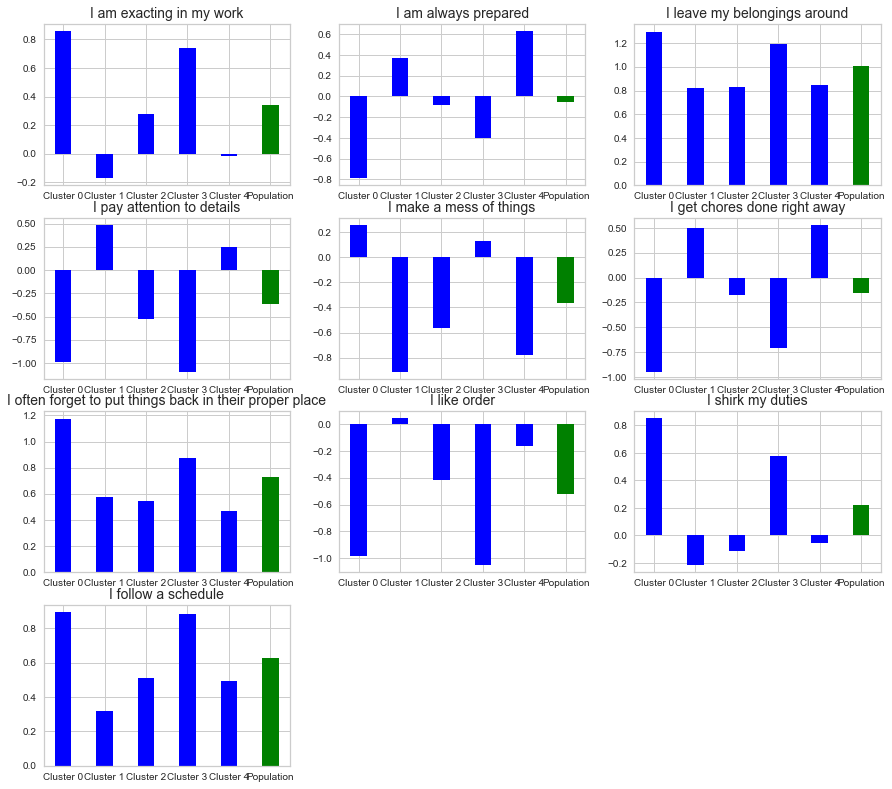

In [41]:
CSN_df_cluster = [column for column in df_cluster if column.startswith('CSN')]
print("Conscientiousness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(CSN, csn_questions, df_cluster[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

Looking at the means when it comes to questions related to conscientiousness, For all clusters, a large majority responded positively to questions `3`, `7`, and `10`. Question `3` and `7` pertains to poor item management with questions on how often the respondents forget to put items back in their place and if they leave their belongings around while question `10` is with regards to proper time management asking if the respondents follow a schedule. This indicates that a majority of the population at the very least manages their time well but are also lacking when it comes to item management. With regards to the trend between clusters, the average responses in `Cluster 1` and `Cluster 3` are similar with responses leaning more to negative. On the other hand, cluster `0`, `2`, and `3`'s responses are generally the opposite of cluster `0` and `3` except for question `4` where `cluster 2` leaned more into the negative as opposed to conscientiousness.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
compare_two_graphs(CSN, csn_questions, df_cluster_std[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].std().transpose(), "Cluster ", "Population STD")

### Agreeableness Questions

#### Cluster Mean vs Population Mean comparison

Agreeableness Questions: Cluster Mean vs Population Mean comparison


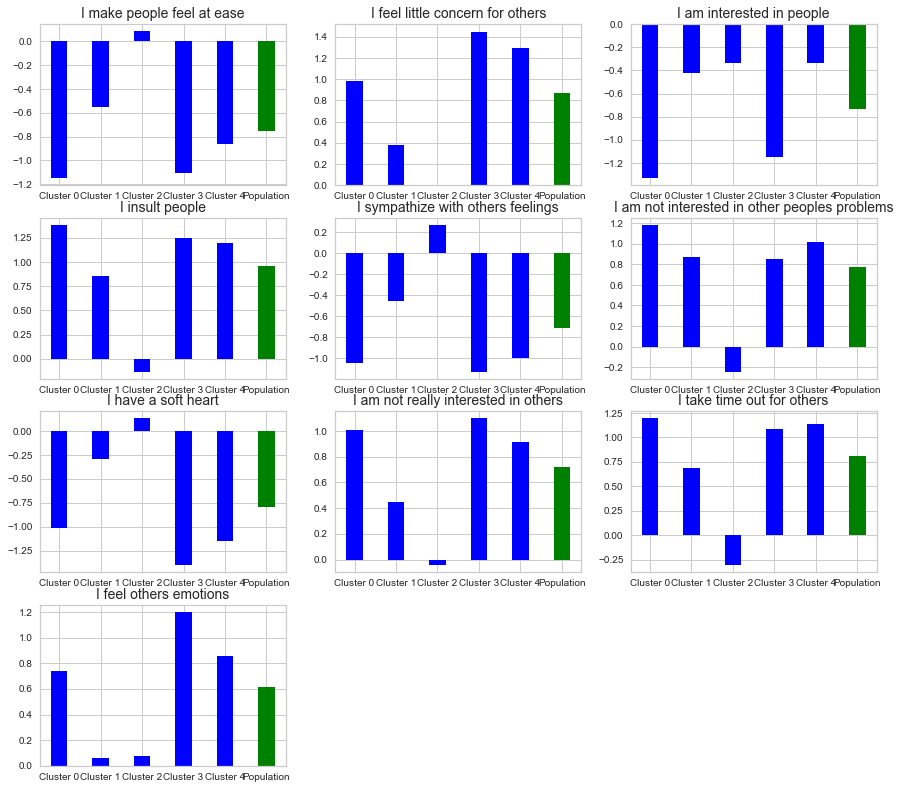

In [42]:
AGR_df_cluster = [column for column in df_cluster if column.startswith('AGR')]
print("Agreeableness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(AGR, agr_questions, df_cluster[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].mean().transpose(), "Cluster", "Population Mean")

##### Analysis

When it comes to agreeableness,`4` out of the `5` clusters have very similar responses for all questions. With clusters `0`, `1`, `3`, and `4` generally having responses leaning away from agreeableness while question `2` gets varied responses with the majority being toward agreeableness. With there being only 1 cluster that is an outlier, the overall population mean for each question shows that most of the respondents are not agreeable.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

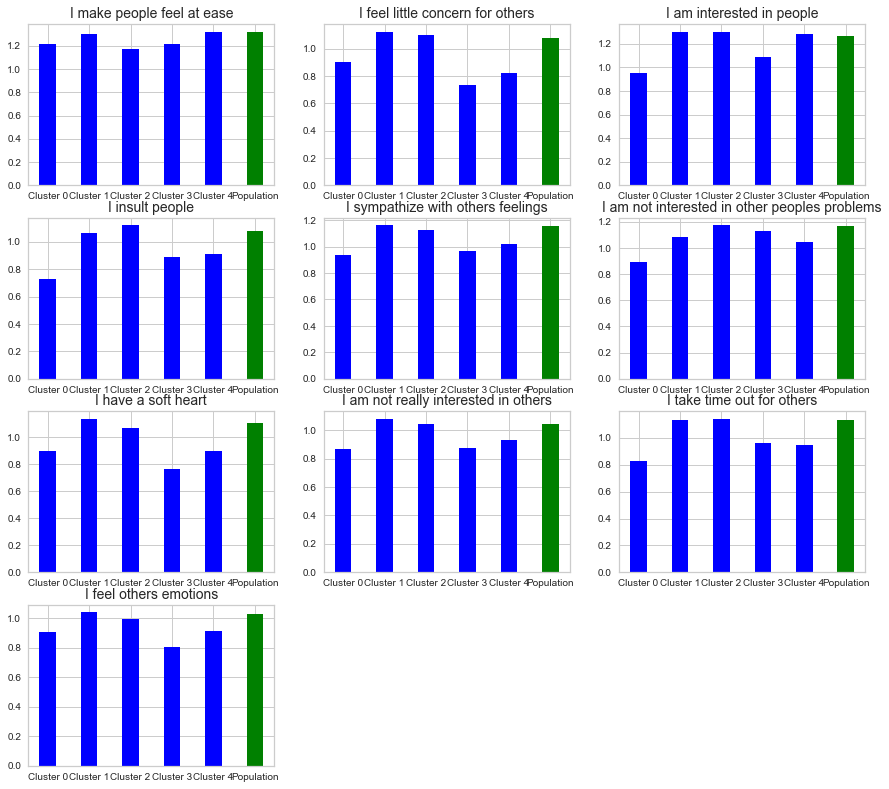

In [46]:
compare_two_graphs(AGR, agr_questions, df_cluster_std[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].std().transpose(), "Cluster", "Population STD")

### Openness Questions

#### Cluster Mean vs Population Mean comparison

Openness Questions: Cluster Mean vs Population Mean comparison


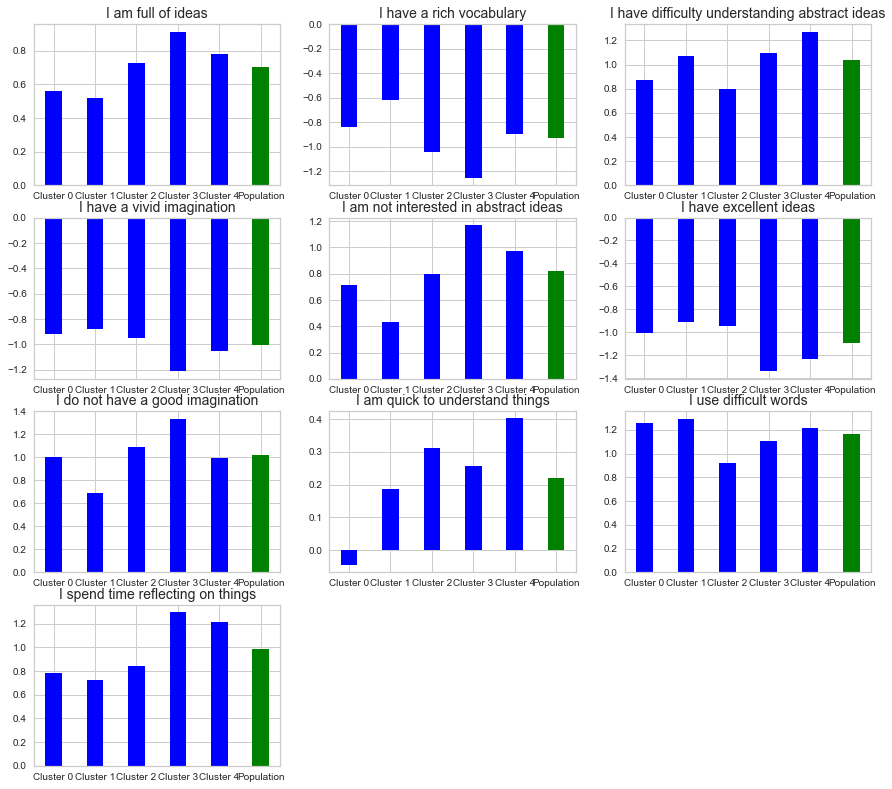

In [43]:
OPN_df_cluster = [column for column in df_cluster if column.startswith('OPN')]
print("Openness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(OPN, opn_questions, df_cluster[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].mean().transpose(), "Cluster", "Population Mean")

##### Analysis

All the responses in the cluster follows the same trend when it comes to questions about intellect, imagination, and openness. Most of the respondents in the clusters lean away from intellect and imagination with negative responses towards abstract ideas and understanding them as well as imagination and excellent ideas. On the other hand, the clusters lean more positively to questions about openness with a positive mean on questions regarding reflection, understanding, and ideas. The only outlier is `cluster 0` in question `8` whose responses generally leaned more towards being slow when it comes to understanding things.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

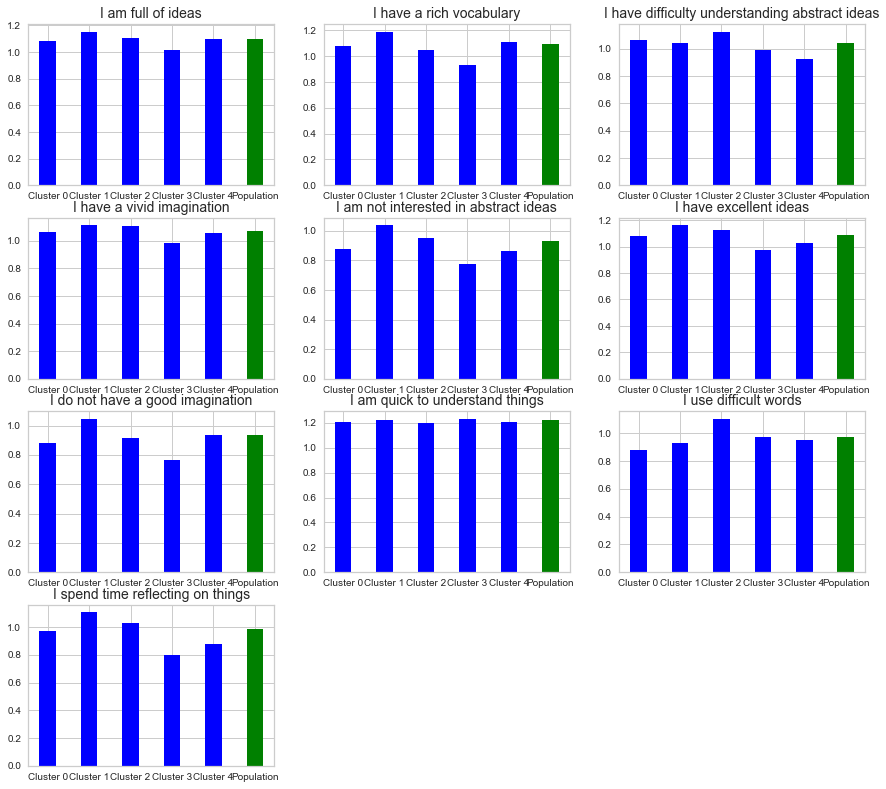

In [47]:
compare_two_graphs(OPN, opn_questions, df_cluster_std[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].std().transpose(), "Cluster", "Population STD")